In [9]:
from token_shap import TokenSHAP

In [10]:
model_name = "hhao/openbmb-minicpm-llama3-v-2_5:latest"
ollama_api_url = "http://localhost:11434"
tshap = TokenSHAP(model_name, ollama_api_url)

## Single Sample

In [11]:
%%time
prompt = "why is the sky blue?"
results = tshap.analyze(prompt, sampling_ratio = 0.2, splitter = ' ')

CPU times: user 132 ms, sys: 28.2 ms, total: 160 ms
Wall time: 2min 4s


In [6]:
tshap.shapley_values

{1: 0.357236073517627,
 2: 0.4295410286336544,
 3: 0.33041329819655263,
 4: 0.48424251416916697,
 5: 0.489185980207626}

In [7]:
results

,Prompt,Response,Token_Indexes,Cosine_Similarity
0,why,"I'm sorry, but I didn't provide any informatio...",[1],0.095098
1,is,"I'm sorry, but I'm not sure what you're asking...",[2],0.024674
2,the,你需要一个特定的查询吗？我可以根据你的需求帮助你查找相关的信息。你想了解什么？,[3],0.000000
3,sky,"As an AI language model, I do not have the abi...",[4],0.082815
4,blue?,"There are many different shades of blue, so it...",[5],0.361960
5,why is sky blue?,Sky appears blue because of a phenomenon calle...,"[1, 2, 4, 5]",0.741852
6,why the blue?,"I am an AI language model trained by OpenAI, a...","[1, 3, 5]",0.234758
7,is the sky blue?,I am an AI language model and do not have a vi...,"[2, 3, 4, 5]",0.441987
8,the sky blue?,"Yes, the sky is typically blue in color. This ...","[3, 4, 5]",0.644908
9,is sky blue?,"Yes, the sky is typically blue during the dayt...","[2, 4, 5]",0.509650


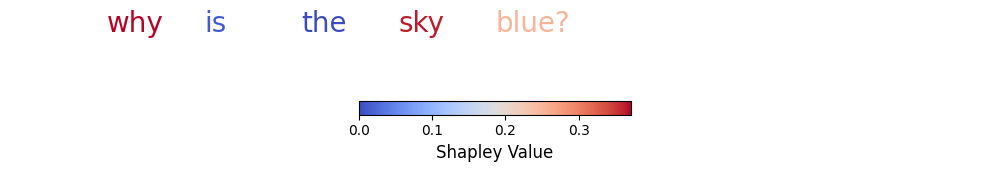

In [7]:
tshap.plot_colored_text()

In [8]:
tshap.print_colored_text()

why is the sky blue? 


In [9]:
tshap.highlight_text_background()

why is the sky blue? 


In [10]:
prompt = 'Complete the following code: def quick_sort(arr):'
results = tshap.analyze(prompt, sampling_ratio = 0.2, splitter = ' ')

In [11]:
tshap.print_colored_text()

Complete the following code: def quick_sort(arr): 


In [ ]:
prompt = """
    Patient is a 45-year-old male presenting with fatigue, fever, shortness of breath, 
    and occasional chest pain. Symptoms have persisted for two weeks. 
    Blood tests show elevated white blood cell count, while chest X-ray indicates mild lung inflammation. 
    Family history includes cardiovascular disease and asthma.
    What is the most likely diagnosis for this patient based on the symptoms and medical history?
"""
results = tshap.analyze(prompt, sampling_ratio = 0.0, splitter = ' ')

## Multiple Samples

In [4]:
prompt = """
    Our company is experiencing a decline in quarterly sales for the first time in five years. 
    Recent market trends indicate increased competition from new startups offering similar products at lower prices. 
    Despite an increase in our online advertising budget, customer engagement on social media platforms has decreased by 15% compared to last quarter. 
    In addition, feedback from customer surveys suggests that many are dissatisfied with the lack of new features in our products. 
    Our largest competitor recently launched a new version of their product with innovative functionalities, which seems to have attracted a significant portion of our customer base.
    What strategic actions should our company consider to regain market share and improve customer satisfaction?
"""
results = tshap.analyze(prompt, splitter ='.', sampling_ratio = 0.4)

In [5]:
results

,Prompt,Response,Token_Indexes,Cosine_Similarity
0,\n Recent market trends indicate increased...,1. Develop innovative features: To compete wit...,"[2, 3, 4, 5, 6]",0.529875
1,\n Our company is experiencing a decline in...,"Based on the information provided, here are so...","[1, 3, 4, 5, 6]",0.538179
2,\n Our company is experiencing a decline in...,1. Conduct a thorough analysis of the competit...,"[1, 2, 4, 5, 6]",0.435363
3,\n Our company is experiencing a decline in...,"As an AI language model, I can provide you wit...","[1, 2, 3, 5, 6]",0.423783
4,\n Our company is experiencing a decline in...,1. Analyze the competition: Conduct a thorough...,"[1, 2, 3, 4, 6]",0.420366
5,\n Our company is experiencing a decline in...,These challenges suggest several key actions f...,"[1, 2, 3, 4, 5]",0.289088
6,\n Recent market trends indicate increased...,Given these recent market trends and customer ...,"[2, 4]",0.365242
7,\n Our company is experiencing a decline in...,As your company experiences a decline in quart...,"[1, 2, 4, 5]",0.499068
8,\n Our company is experiencing a decline in...,There are several strategic actions that your ...,"[1, 3, 5, 6]",0.558259
9,\n Despite an increase in our online adver...,These challenges may be affecting your busines...,"[3, 4, 5]",0.446245


In [7]:
tshap.print_colored_text()


    Our company is experiencing a decline in quarterly sales for the first time in five years  
    Recent market trends indicate increased competition from new startups offering similar products at lower prices  
    Despite an increase in our online advertising budget, customer engagement on social media platforms has decreased by 15% compared to last quarter  
    In addition, feedback from customer surveys suggests that many are dissatisfied with the lack of new features in our products  
    Our largest competitor recently launched a new version of their product with innovative functionalities, which seems to have attracted a significant portion of our customer base 
    What strategic actions should our company consider to regain market share and improve customer satisfaction?
 


In [8]:
tshap.highlight_text_background()


    Our company is experiencing a decline in quarterly sales for the first time in five years  
    Recent market trends indicate increased competition from new startups offering similar products at lower prices  
    Despite an increase in our online advertising budget, customer engagement on social media platforms has decreased by 15% compared to last quarter  
    In addition, feedback from customer surveys suggests that many are dissatisfied with the lack of new features in our products  
    Our largest competitor recently launched a new version of their product with innovative functionalities, which seems to have attracted a significant portion of our customer base 
    What strategic actions should our company consider to regain market share and improve customer satisfaction?
 
